# [Task 1] Brief Description

The MavenRail dataset is a fictional train purchases records in the UK from 1 January to 31 April 2024 provided by Maven Analytics, a firm that provides training in Data Science. It is created to mimic the actual travelling behaviour of the passengers and the train performances. This dataset enables exploratory analysis and modelling to study travel patterns, delays, and refunds.

The data includes:
- Payment Method and Railcard: how passengers pay and what type of railcards they use
- Ticket Class, Ticket Type, Price: the class and type of ticket purchased, which may affect pricing (in GBP)
- Departure and Arrival Stations: origin and destination for each journey
- Departure Time and Arrival Time: scheduled vs actual times, to examine punctuality.
- Journey Status and Delay Reason: indicates delays and delay reasons
- Refund Requests: made by passengers due to the delays

Table 1 illustrates a quick snapshot of the data. 

Import Libraries

In [729]:
# Basic numerics
import numpy as np
import scipy as sp
import scipy.stats as st

# Data handling
import pandas as pd
from datetime import datetime

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Statistical modelling tools
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

Table 1 - Snapshot of the Data

In [732]:
# Read the data
data = pd.read_csv('MavenRail.csv') 
data.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No


# [Task 2] Exploratory Data Analysis

Step 1: Data Overview

In [736]:
# Overview of the dataset
print("Data Summary:")
print(data.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31645 non-null  object
 1   Railcard           10734 non-null  object
 2   Ticket.Class       31645 non-null  object
 3   Ticket.Type        31645 non-null  object
 4   Price              31645 non-null  int64 
 5   Departure.Station  31645 non-null  object
 6   Arrival.Station    31645 non-null  object
 7   Departure          31642 non-null  object
 8   Scheduled.Arrival  31641 non-null  object
 9   Actual.Arrival     29765 non-null  object
 10  Journey.Status     31645 non-null  object
 11  Reason.for.Delay   4166 non-null   object
 12  Refund.Request     31645 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB
None


Step 2: Data Cleaning

2a. Check Missing Values

In [740]:
# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
Payment.Method           0
Railcard             20911
Ticket.Class             0
Ticket.Type              0
Price                    0
Departure.Station        0
Arrival.Station          0
Departure                3
Scheduled.Arrival        4
Actual.Arrival        1880
Journey.Status           0
Reason.for.Delay     27479
Refund.Request           0
dtype: int64


Please do ignore the following as they are not missing values
1. 20911 values in Railcard represent 20911 train ticket purchased without railcard. These are not missing values.
2. 1880 values in Actual.Arrival represent 1880 cancelled trains, meaning they did not depart. These are not missing values.
3. 27479 values in Reason.for.Delay represent 27479 train journeys without disruptions. These are not missing values.

The true missing values are:
1. 1 record without Departure, Scheduled.Arrival, and Actual.Arrival
2. 2 records without Departure
3. 2 records without Scheduled.Arrival and Actual.Arrival
4. 1 record without Scheduled.Arrival

Total missing values = 6 (0.02%). I decided to delete them.

For the "missing" values in Railcard, Reason.for.Delay, and Actual.Arrival, I would like to replace them with "None", "N/A", and "Cancelled" respectively.

In [743]:
# Delete 6 records with missing values
indices_to_drop = [23609, 23613, 23614, 23616, 23618, 23624]
data = data.drop(indices_to_drop)

In [745]:
# Replace missing values using a dictionary to specify columns and replacement values
data.fillna({
    'Railcard': "None",
    'Reason.for.Delay': "N/A",
    'Actual.Arrival': "Cancelled"
}, inplace=True)

In [747]:
print(data.isnull().sum())

Payment.Method       0
Railcard             0
Ticket.Class         0
Ticket.Type          0
Price                0
Departure.Station    0
Arrival.Station      0
Departure            0
Scheduled.Arrival    0
Actual.Arrival       0
Journey.Status       0
Reason.for.Delay     0
Refund.Request       0
dtype: int64


In [749]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31639 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31639 non-null  object
 1   Railcard           31639 non-null  object
 2   Ticket.Class       31639 non-null  object
 3   Ticket.Type        31639 non-null  object
 4   Price              31639 non-null  int64 
 5   Departure.Station  31639 non-null  object
 6   Arrival.Station    31639 non-null  object
 7   Departure          31639 non-null  object
 8   Scheduled.Arrival  31639 non-null  object
 9   Actual.Arrival     31639 non-null  object
 10  Journey.Status     31639 non-null  object
 11  Reason.for.Delay   31639 non-null  object
 12  Refund.Request     31639 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.4+ MB


2b. Correcting Data Types

Departure, Scheduled.Arrival, and Actual.Arrival should be in date format

In [752]:
# Convert date columns to datetime format
data['Departure'] = pd.to_datetime(data['Departure'], format='%Y-%m-%d %H:%M')
data['Scheduled.Arrival'] = pd.to_datetime(data['Scheduled.Arrival'], format='%Y-%m-%d %H:%M')
data['Actual.Arrival'] = pd.to_datetime(data['Actual.Arrival'], format='%Y-%m-%d %H:%M', errors='coerce')

In [754]:
data.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,N/A,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No
2,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,N/A,No
3,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,N/A,No
4,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,N/A,No


In [756]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31639 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     31639 non-null  object        
 1   Railcard           31639 non-null  object        
 2   Ticket.Class       31639 non-null  object        
 3   Ticket.Type        31639 non-null  object        
 4   Price              31639 non-null  int64         
 5   Departure.Station  31639 non-null  object        
 6   Arrival.Station    31639 non-null  object        
 7   Departure          31639 non-null  datetime64[ns]
 8   Scheduled.Arrival  31639 non-null  datetime64[ns]
 9   Actual.Arrival     29762 non-null  datetime64[ns]
 10  Journey.Status     31639 non-null  object        
 11  Reason.for.Delay   31639 non-null  object        
 12  Refund.Request     31639 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(9)
memory usage: 3.4+ MB
No

Note: There are 1877 NaT in Actual.Arrival. These are for cancelled trains. They do not have arrival times because they are cancelled

2c. Remove duplicates

In [760]:
# Check for duplicate rows
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows, if any
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(data[duplicates])
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 5631

Duplicate rows:
      Payment.Method  Railcard Ticket.Class Ticket.Type  Price  \
16       Credit Card      None     Standard     Advance     13   
89       Contactless      None     Standard    Off-Peak     11   
97       Contactless  Disabled     Standard     Advance      5   
122       Debit Card    Senior     Standard     Anytime     17   
125      Credit Card    Senior     Standard     Anytime      3   
142      Credit Card      None     Standard     Anytime     70   
151      Credit Card      None     Standard     Anytime    151   
153      Credit Card      None     Standard     Anytime    151   
156      Credit Card      None     Standard     Anytime    151   
167      Credit Card      None     Standard     Anytime     35   
168      Credit Card      None     Standard     Anytime     70   
170      Credit Card      None     Standard     Anytime     25   
176      Contactless      None     Standard     Advance      3   
184      Credit Card      No

In [761]:
# Remove duplicate rows
data = data.drop_duplicates()

# Verify that duplicates are removed
print("Number of rows after removing duplicates:", data.shape[0])

Number of rows after removing duplicates: 26008


In [961]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26008 entries, 0 to 31644
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     26008 non-null  object        
 1   Railcard           26008 non-null  object        
 2   Ticket.Class       26008 non-null  object        
 3   Ticket.Type        26008 non-null  object        
 4   Price              26008 non-null  int64         
 5   Departure.Station  26008 non-null  object        
 6   Arrival.Station    26008 non-null  object        
 7   Departure          26008 non-null  datetime64[ns]
 8   Scheduled.Arrival  26008 non-null  datetime64[ns]
 9   Actual.Arrival     24558 non-null  datetime64[ns]
 10  Journey.Status     26008 non-null  object        
 11  Reason.for.Delay   26008 non-null  object        
 12  Refund.Request     26008 non-null  object        
 13  Month              26008 non-null  object        
 14  Week.Of.Mon

Note: There are 1450 NaT in Actual.Arrival which represent cancelled trains

Step 3: Univariate Analysis

3a. Price (the only int data)

In [769]:
# Get summary statistics only for the Price column
print(data['Price'].describe())

count    26008.000000
mean        22.995617
std         29.077573
min          1.000000
25%          5.000000
50%         11.000000
75%         35.000000
max        267.000000
Name: Price, dtype: float64


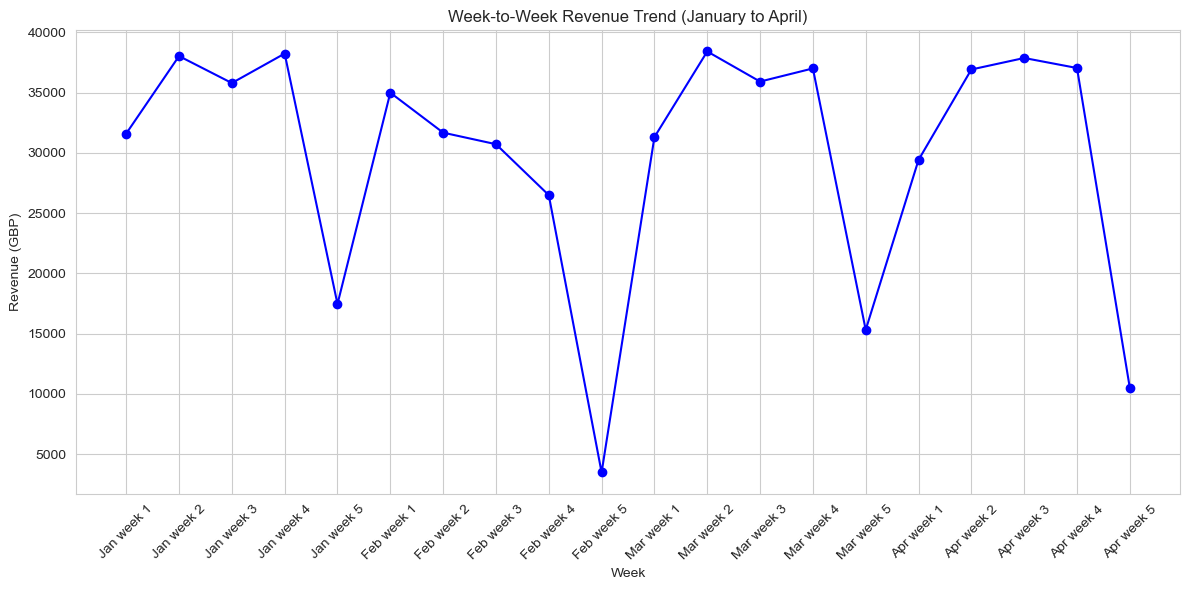


Monthly Revenue Summary:
Month
Jan    161092
Feb    127334
Mar    157926
Apr    151718
Name: Price, dtype: int64
Total Revenue from ticket sales in GBP: 598070
Total number of transaction: 26008


In [771]:
# Calculate revenue trends

# Ensure 'Price' is a numeric column (in case it's not)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Convert 'Departure' column to datetime if it's not already
data['Departure'] = pd.to_datetime(data['Departure'], errors='coerce')

# Drop rows with NaN values in 'Departure' or 'Price' column
data = data.dropna(subset=['Departure', 'Price'])

# Extract month name and week of the month
data['Month'] = data['Departure'].dt.strftime('%b')
data['Week.Of.Month'] = data['Departure'].apply(lambda x: (x.day - 1) // 7 + 1)

# Combine month and week of the month into the desired format
data['Month.Week'] = data['Month'] + " week " + data['Week.Of.Month'].astype(str)

# Calculate total revenue per month-week
weekly_revenue = data.groupby('Month.Week')['Price'].sum()

# Sort the data to ensure the correct chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr']
weekly_revenue = weekly_revenue.loc[sorted(weekly_revenue.index, key=lambda x: (month_order.index(x.split()[0]), int(x.split()[-1])))]

# Plot the weekly revenue trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', color='b')
plt.title("Week-to-Week Revenue Trend (January to April)")
plt.xlabel("Week")
plt.ylabel("Revenue (GBP)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate total revenue per month
monthly_revenue = data.groupby('Month')['Price'].sum()

# Sort the monthly revenue summary based on month order
monthly_revenue = monthly_revenue.reindex(month_order)

# Calculate total revenue and transaction count
total_revenue = data['Price'].sum()
total_transactions = len(data)

# Display the monthly revenue summary with totals
print("\nMonthly Revenue Summary:")
print(monthly_revenue)

total_revenue = data['Price'].sum()
print("Total Revenue from ticket sales in GBP:", total_revenue)
print("Total number of transaction:", len(data))

Takeaway: The revenue trend is fluctuative but it always went up in the middle of each month. January has the highest sales while February was the lowest.

3b. Departure (busiest travel time/peak hour)

In [775]:
# Extract the hour from the 'Departure' time
data['Departure.Hour'] = data['Departure'].dt.hour

# Group by 'Departure_Hour' and count the number of departures in each hour
hourly_counts = data['Departure.Hour'].value_counts().sort_index()

# Identify the peak hour(s)
peak_hour = hourly_counts.idxmax()
peak_count = hourly_counts.max()

print("Hourly travel counts:")
print(hourly_counts)

Hourly travel counts:
Departure.Hour
0      702
1      585
2      838
3      504
4      904
5      692
6     2442
7     2002
8     1559
9     1117
10     505
11    1054
12     706
13    1142
14     808
15    1078
16    1771
17    2231
18    2234
19     399
20     933
21     498
22     717
23     587
Name: count, dtype: int64


The busiest period is between 6-9AM and 3-6PM.

There are 8 categorical variables:
1. Payment.Method
2. Railcard
3. Ticket.Class
4. Ticket.Type
5. Departure.Station
6. Arrival.Station
7. Journey.Status
8. Reason.for.Delay

For these variables, I will use a function that iterates over each column and displays the frequency of each unique value within that column. By reviewing these value counts, we can get a sense of how each category is distributed and which values are dominant or rare in the dataset.

In [779]:
# List of categorical columns
categorical_columns = ['Payment.Method', 'Railcard', 'Ticket.Class', 'Ticket.Type', 'Departure.Station', 'Arrival.Station', 'Journey.Status', 'Reason.for.Delay', 'Refund.Request']

# Calculate total revenue (sum of the Price column)
total_revenue = data['Price'].sum()

# Calculate total count of rows to find count percentages
total_count = len(data)

# Loop through each categorical column
for column in categorical_columns:
    print(f"\nAnalysis for {column}:")

    # Count occurrences of each category
    counts = data[column].value_counts()

    # Calculate the percentage of total count for each category
    count_percentage = (counts / total_count) * 100

    # Group by the column and sum the Price to get revenue per category
    revenue_by_category = data.groupby(column)['Price'].sum()

    # Calculate the percentage of total revenue for each category
    revenue_percentage = (revenue_by_category / total_revenue) * 100

    # Combine counts, count percentage, revenue, and revenue percentage into a DataFrame with the specified order
    result = pd.DataFrame({
        'Count': counts,
        'Count (%)': count_percentage,
        'Revenue (GBP)': revenue_by_category,
        'Revenue (%)': revenue_percentage
    })

    # Display result, filling NaN values with 0 (if any category in revenue has no count or vice versa)
    print(result.fillna(0))


Analysis for Payment.Method:
                Count  Count (%)  Revenue (GBP)  Revenue (%)
Payment.Method                                              
Contactless      9487  36.477238         195941    32.762218
Credit Card     15163  58.301292         354877    59.337034
Debit Card       1358   5.221470          47252     7.900747

Analysis for Railcard:
          Count  Count (%)  Revenue (GBP)  Revenue (%)
Railcard                                              
Adult      4175  16.052753          79386    13.273697
Disabled   2515   9.670102          43979     7.353487
None      17150  65.941249         450121    75.262260
Senior     2168   8.335897          24584     4.110556

Analysis for Ticket.Class:
              Count  Count (%)  Revenue (GBP)  Revenue (%)
Ticket.Class                                              
First Class    2964  11.396493         143817    24.046851
Standard      23044  88.603507         454253    75.953149

Analysis for Ticket.Type:
             Count  

Our findings so far based on univariate analysis:
- [Price] Average ticket price is GBP23
- [Departure] The busiest period is between 6-9AM and 3-6PM
- [Payment.Method] Most popular payment method is credit card (58%)
- Revenue
    - [Railcard] 75% revenue was generated from purchase without railcard. Many people did not use railcard, maybe due to most people are aged 30<x<65 and there’s no railcard for this productive age range
    - [Ticket.Class] 75% revenue came from standard tickets
    - [Ticket.Type] 42% revenue came from advance tickets
    - [Refund.Request] Refund impact towards revenue was 6% (it decreased the revenue)
- [Departure.Station] 88% of people departed from:
    - Liverpool lime street
    - London euston
    - London kings cross
    - London paddington
    - London st pancras
    - Manchester piccadilly
- [Arrival.Station] 81% of poeple travel to:
    - Birmingham
    - Liverpool lime street
    - Manchester piccadilly
    - Reading
    - York
- [Journey.Status] 88% trains were on time, 6% cancelled, and 5.6% delayed
- [Reason.for.Delay] 27% of delays/cancellations was caused by weather, and 25% by signal failure

Step 4: Bivariate & Multivariate Analysis

Next I'm going to use crosstabs to show the interaction or relationship between two or more categorical variables by creating a frequency table. The relationships to be examined are:
1. Price vs Departure

To see the variation of price between peak hour and non-peak. Price will be divided into 3 buckets (cheap <GBP11, normal GBP11-GBP35, expensive >GBP35). This is to check if price algorithm has existed. If not then this can be future improvement for train companies.

2. Railcard usage vs Ticket.Class vs Ticket.Type

To find out if having railcard has a direct effect to ticket preferences.

3. Departure.Station vs Arrival.Station vs Journey.Status

To find most popular routes, observe how frequently they are traveled across different time periods, and performance of each route.

4. Journey.Status vs Refund.Request

To find the main cause of refund

5. Journey.Status vs Departure

To show the number of disruptions (both cancelled and delayed) for each reason and departure hour, providing insights into the timing and causes of all disruptions

In [784]:
# (1) Price vs Departure

# Step 1: Bucketize the Price column
def categorize_price(price):
    if price <= 5:
        return 'Cheap'
    elif price <= 35:
        return 'Normal'
    else:
        return 'Expensive'

data['Price.Category'] = data['Price'].apply(categorize_price)

# Step 2: Define Peak Hours (6-9 AM and 3-6 PM) and create a column for Peak/Non-Peak
def categorize_peak(hour):
    if 6 <= hour <= 9 or 15 <= hour <= 18:
        return 'Peak'
    else:
        return 'Non-Peak'

# Apply the hour from Departure and apply peak/non-peak categorization
data['Peak.Status'] = data['Departure.Hour'].apply(categorize_peak)

# Step 3: Crosstab analysis to see the distribution of Price Category between Peak and Non-Peak
crosstab_result = pd.crosstab(data['Peak.Status'], data['Price.Category'], normalize='index') * 100

# Display the result
print("Crosstab Analysis of Price Category by Peak/Non-Peak Status (%):")
print(crosstab_result)

Crosstab Analysis of Price Category by Peak/Non-Peak Status (%):
Price.Category      Cheap  Expensive     Normal
Peak.Status                                    
Non-Peak        32.521168  15.871782  51.607050
Peak            24.116669  20.811972  55.071359


Takeaway: 55% train tickets were priced relatively normal and 24% cheap during the peak hour. There might not be a price algorithm yet. This can be developed in the future to optimize revenue for train companies.

In [787]:
# (2) Railcard usage vs Ticket.Class vs Ticket.Type

# Crosstab Analysis: Railcard usage vs Ticket Class vs Ticket Type
crosstab_result = pd.crosstab(
    [data['Railcard']],              # Row: Railcard usage
    [data['Ticket.Class'], data['Ticket.Type']],  # Columns: Ticket Class and Ticket Type
    margins=True,                     # Include row and column totals
    normalize='index'                 # Normalize by row to see percentage distribution
) * 100

# Display the result
print("Crosstab Analysis of Railcard Usage vs Ticket Class and Ticket Type (%):")
print(crosstab_result)

Crosstab Analysis of Railcard Usage vs Ticket Class and Ticket Type (%):
Ticket.Class First Class                       Standard                      
Ticket.Type      Advance   Anytime  Off-Peak    Advance    Anytime   Off-Peak
Railcard                                                                     
Adult           6.826347  1.940120  2.754491  48.550898  13.988024  25.940120
Disabled        6.600398  2.107356  3.300199  47.316103  15.029821  25.646123
None            6.379009  1.632653  3.195335  49.061224  12.804665  26.927114
Senior          7.564576  2.398524  1.983395  47.555351  18.496310  22.001845
All             6.571055  1.791756  3.033682  48.685020  13.684251  26.234236


Takeaway: Having railcards does not change people preferences towards ticket class or type. Nearly half of the passengeres went for Standard and Advance tickets.

In [790]:
# (3) Departure.Station vs Arrival.Station vs. Journey.Status

# Set Pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Create a new column that combines Departure.Station and Arrival.Station to represent each route, truncated to 40 characters
data['Route'] = (data['Departure.Station'] + " to " + data['Arrival.Station']).str.slice(0, 40)

# Count the occurrences of each route
route_counts = data['Route'].value_counts()

# Calculate the total number of routes (sum of all route occurrences)
total_routes = route_counts.sum()

# Calculate the percentage of each route and round to 2 decimal places
route_percentage = (route_counts / total_routes * 100).round(2)

# Crosstab to get counts of each Journey.Status per route
status_counts = pd.crosstab(data['Route'], data['Journey.Status'])

# Ensure all Journey.Status categories exist in the crosstab (in case some routes have no "Cancelled" or "Delayed" trips)
status_counts = status_counts.reindex(columns=['On Time', 'Cancelled', 'Delayed'], fill_value=0)

# Calculate the percentage for each journey status and round to 2 decimal places
status_percentages = (status_counts.T / route_counts).T * 100
status_percentages = status_percentages.round(2)

# Combine count, route percentage, and journey status percentage information into a DataFrame with shorter column labels
all_routes_df = pd.DataFrame({
    'Count': route_counts,
    '%': route_percentage,
    'OT%': status_percentages['On Time'],
    'C%': status_percentages['Cancelled'],
    'D%': status_percentages['Delayed']
})

# Sort the DataFrame by Count in descending order
all_routes_df_sorted = all_routes_df.sort_values(by='Count', ascending=False)

# Calculate the total number of unique routes
total_unique_routes = data['Route'].nunique()

# Calculate the average for each journey status percentage
average_ot = all_routes_df_sorted['OT%'].mean().round(2)
average_c = all_routes_df_sorted['C%'].mean().round(2)
average_d = all_routes_df_sorted['D%'].mean().round(2)

# Append the averages as a summary row at the bottom
summary_row = pd.DataFrame({
    'Count': [pd.NA],
    '%': [pd.NA],
    'OT%': [average_ot],
    'C%': [average_c],
    'D%': [average_d]
}, index=["Average"])

all_routes_df_with_summary = pd.concat([all_routes_df_sorted, summary_row])

# Display the result
print("All Routes with Counts, Percentage of Total Routes, and Journey Status Breakdown:")
print(all_routes_df_with_summary)
print(f"\nTotal number of unique routes: {total_unique_routes}")

All Routes with Counts, Percentage of Total Routes, and Journey Status Breakdown:
                                         Count      %     OT%     C%      D%
Manchester Piccadilly to Liverpool Lime   3672  14.12   87.50   6.07    6.43
London Euston to Birmingham New Street    3526  13.56   90.13   5.16    4.71
London Kings Cross to York                3261  12.54   91.93   4.88    3.19
London Paddington to Reading              3202  12.31   91.29   6.93    1.78
London St Pancras to Birmingham New Stre  2810  10.80   93.17   6.83    0.00
Liverpool Lime Street to Manchester Picc  2714  10.44   92.26   4.09    3.65
London Euston to Manchester Piccadilly     658   2.53   93.62   6.38    0.00
Liverpool Lime Street to London Euston     571   2.20   28.90   8.58   62.52
Birmingham New Street to London St Pancr   506   1.95   93.28   6.72    0.00
Manchester Piccadilly to London Euston     310   1.19   32.26   0.97   66.77
London Paddington to Oxford                236   0.91   86.02  13.98   

/var/folders/5n/gmdc45hn66ndgk139mj4gpyh0000gn/T/ipykernel_6703/542772325.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_routes_df_with_summary = pd.concat([all_routes_df_sorted, summary_row])


Takeaway: There are a total of 65 unique routes. The top 6 routes which constitutes 73,77% of the total possible routes with great performance based on:
- OnTime rate (OT%). Top 6 routes have OT% greater than 85.52% (the avg of OT% of all routes).
- Delay rate (D%). Top 6 routes have D% less than 10.22% (the avg of D% of all routes).

However the cancellation rate (C%) of these top 6 routes were above average (the avg is 4.25%), except for Liverpool Lime Street to Manchester Piccadilly. This shall be investigated further.

In [793]:
# (4) Journey.Status vs Refund.Request

# Crosstab Analysis: Journey.Status vs Refund.Request
crosstab_result = pd.crosstab(
    data['Journey.Status'],        # Rows: Journey Status (e.g., On Time, Delayed, Cancelled)
    data['Refund.Request'],        # Columns: Refund Request (Yes/No)
    margins=True                   # Include totals for rows and columns
)

# Display the result
print("Crosstab Analysis of Journey Status by Refund Request:")
print(crosstab_result)

Crosstab Analysis of Journey Status by Refund Request:
Refund.Request     No   Yes    All
Journey.Status                    
Cancelled         882   568   1450
Delayed          1071   499   1570
On Time         22988     0  22988
All             24941  1067  26008


Takeaway: 39% cancelled trains were refunded, while for delayed trains was only 32%. Cancellations have a slightly higher likelihood to drive passengers raise refund.

In [796]:
# (5) Journey.Status vs Departure

# Create a subset of data to focus only on disruptions (Cancelled and Delayed)
disruptions_data = data[data['Journey.Status'] != "On Time"].copy()  # Use .copy() to create an independent DataFrame

disruptions_data.info()
disruptions_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 1 to 31637
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     3020 non-null   object        
 1   Railcard           3020 non-null   object        
 2   Ticket.Class       3020 non-null   object        
 3   Ticket.Type        3020 non-null   object        
 4   Price              3020 non-null   int64         
 5   Departure.Station  3020 non-null   object        
 6   Arrival.Station    3020 non-null   object        
 7   Departure          3020 non-null   datetime64[ns]
 8   Scheduled.Arrival  3020 non-null   datetime64[ns]
 9   Actual.Arrival     1570 non-null   datetime64[ns]
 10  Journey.Status     3020 non-null   object        
 11  Reason.for.Delay   3020 non-null   object        
 12  Refund.Request     3020 non-null   object        
 13  Month              3020 non-null   object        
 14  Week.Of.Mont

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,Month,Week.Of.Month,Month.Week,Departure.Hour,Price.Category,Peak.Status,Route
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,Jan,1,Jan week 1,9,Normal,Peak,London Kings Cross to York
8,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,Delayed,Signal Failure,No,Jan,1,Jan week 1,0,Expensive,Non-Peak,London Euston to York
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,Delayed,Technical Issue,Yes,Jan,1,Jan week 1,11,Normal,Non-Peak,Birmingham New Street to Manchester Picc
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,Delayed,Signal Failure,Yes,Jan,1,Jan week 1,14,Normal,Non-Peak,Oxford to Bristol Temple Meads
39,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,Cancelled,Technical Issue,No,Jan,1,Jan week 1,2,Normal,Non-Peak,London Euston to Birmingham New Street


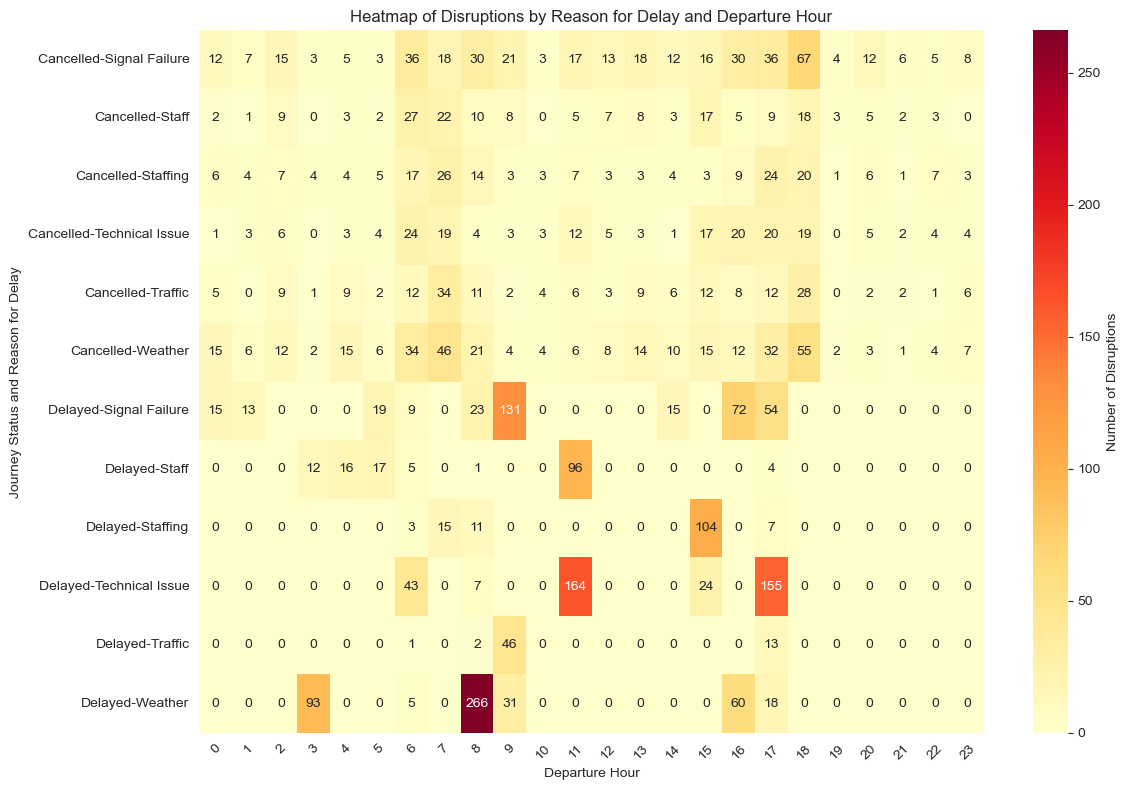

In [798]:
# Crosstab Analysis: Journey.Status vs Reason.for.Delay vs Departure Hour
crosstab_result = pd.crosstab(
    [disruptions_data['Journey.Status'], disruptions_data['Reason.for.Delay']],  # Rows: Journey Status and Reason for Delay
    disruptions_data['Departure.Hour'],                                          # Columns: Departure Hour
    margins=False                                                                # Exclude totals for a cleaner heatmap
)

# Plot heatmap with a sequential colormap for lighter to darker effect
plt.figure(figsize=(12, 8))
sns.heatmap(
    crosstab_result,
    cmap="YlOrRd",               # Sequential color map for better contrast from light to dark
    annot=True,                  # Display the counts in each cell
    fmt="d",                     # Format as integers
    cbar_kws={'label': 'Number of Disruptions'}
)
plt.title("Heatmap of Disruptions by Reason for Delay and Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Journey Status and Reason for Delay")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Takeaway: Most disruptions happen within peak hour (6-9AM and 3-6PM) and caused by weather issues, technical issues, and signal failure. Knowing this will allow improvements especially on controllable factors (i.e. providing more technical support staffs during peak hours).

# [Task 3] Add DelayInMinutes

In [801]:
# Ensure that 'Scheduled.Arrival' and 'Actual.Arrival' are in datetime format
disruptions_data['Scheduled.Arrival'] = pd.to_datetime(disruptions_data['Scheduled.Arrival'], errors='coerce')
disruptions_data['Actual.Arrival'] = pd.to_datetime(disruptions_data['Actual.Arrival'], errors='coerce')

# Calculate Delay.In.Minutes for delayed journeys and set to NaN for cancelled journeys
disruptions_data['Delay.In.Minutes'] = np.where(
    disruptions_data['Journey.Status'] == 'Delayed',
    (disruptions_data['Actual.Arrival'] - disruptions_data['Scheduled.Arrival']).dt.total_seconds() / 60,
    np.nan
)

# Display the first few rows to verify the new column
data.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,Month,Week.Of.Month,Month.Week,Departure.Hour,Price.Category,Peak.Status,Route
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,N/A,No,Jan,1,Jan week 1,11,Expensive,Non-Peak,London Paddington to Liverpool Lime Stre
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,Jan,1,Jan week 1,9,Normal,Peak,London Kings Cross to York
2,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,N/A,No,Jan,1,Jan week 1,18,Cheap,Peak,Liverpool Lime Street to Manchester Picc
3,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,N/A,No,Jan,1,Jan week 1,21,Normal,Non-Peak,London Paddington to Reading
4,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,N/A,No,Jan,1,Jan week 1,16,Expensive,Peak,Liverpool Lime Street to London Euston


In [803]:
disruptions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 1 to 31637
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     3020 non-null   object        
 1   Railcard           3020 non-null   object        
 2   Ticket.Class       3020 non-null   object        
 3   Ticket.Type        3020 non-null   object        
 4   Price              3020 non-null   int64         
 5   Departure.Station  3020 non-null   object        
 6   Arrival.Station    3020 non-null   object        
 7   Departure          3020 non-null   datetime64[ns]
 8   Scheduled.Arrival  3020 non-null   datetime64[ns]
 9   Actual.Arrival     1570 non-null   datetime64[ns]
 10  Journey.Status     3020 non-null   object        
 11  Reason.for.Delay   3020 non-null   object        
 12  Refund.Request     3020 non-null   object        
 13  Month              3020 non-null   object        
 14  Week.Of.Mont

Note: There are only 1570 delay cases, which is why the attribute DelayInMinutes only have 1570 values

# [Task 4] Non-On Time Journey Analysis

Step 1: Restrict attention to those journeys where Journey.Status is not On Time. We already have a subset for this named "disruptions_data"

In [809]:
disruptions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 1 to 31637
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     3020 non-null   object        
 1   Railcard           3020 non-null   object        
 2   Ticket.Class       3020 non-null   object        
 3   Ticket.Type        3020 non-null   object        
 4   Price              3020 non-null   int64         
 5   Departure.Station  3020 non-null   object        
 6   Arrival.Station    3020 non-null   object        
 7   Departure          3020 non-null   datetime64[ns]
 8   Scheduled.Arrival  3020 non-null   datetime64[ns]
 9   Actual.Arrival     1570 non-null   datetime64[ns]
 10  Journey.Status     3020 non-null   object        
 11  Reason.for.Delay   3020 non-null   object        
 12  Refund.Request     3020 non-null   object        
 13  Month              3020 non-null   object        
 14  Week.Of.Mont

In [811]:
disruptions_data.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,...,Reason.for.Delay,Refund.Request,Month,Week.Of.Month,Month.Week,Departure.Hour,Price.Category,Peak.Status,Route,Delay.In.Minutes
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,...,Signal Failure,No,Jan,1,Jan week 1,9,Normal,Peak,London Kings Cross to York,5.0
8,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,...,Signal Failure,No,Jan,1,Jan week 1,0,Expensive,Non-Peak,London Euston to York,17.0
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,...,Technical Issue,Yes,Jan,1,Jan week 1,11,Normal,Non-Peak,Birmingham New Street to Manchester Picc,31.0
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,...,Signal Failure,Yes,Jan,1,Jan week 1,14,Normal,Non-Peak,Oxford to Bristol Temple Meads,24.0
39,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,...,Technical Issue,No,Jan,1,Jan week 1,2,Normal,Non-Peak,London Euston to Birmingham New Street,NaN


Step 2: Add MediumPrice Column (price range £10 < Price ≤ £30)

In [814]:
# Define a function to classify the ticket price
def classify_price(price):
    return 10 < price <= 30  # Returns True if within range, False otherwise

# Add the new MediumPrice column
disruptions_data['Medium.Price'] = disruptions_data['Price'].apply(classify_price)

# Display the first 5 rows to verify the new column
display(disruptions_data.head())

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,...,Refund.Request,Month,Week.Of.Month,Month.Week,Departure.Hour,Price.Category,Peak.Status,Route,Delay.In.Minutes,Medium.Price
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,...,No,Jan,1,Jan week 1,9,Normal,Peak,London Kings Cross to York,5.0,True
8,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,...,No,Jan,1,Jan week 1,0,Expensive,Non-Peak,London Euston to York,17.0,False
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,...,Yes,Jan,1,Jan week 1,11,Normal,Non-Peak,Birmingham New Street to Manchester Picc,31.0,False
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,...,Yes,Jan,1,Jan week 1,14,Normal,Non-Peak,Oxford to Bristol Temple Meads,24.0,False
39,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,...,No,Jan,1,Jan week 1,2,Normal,Non-Peak,London Euston to Birmingham New Street,NaN,False


Step 3: Fit a regression model using MediumPrice as a single predictor, to predict if a passenger will request a refund

In [817]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Encode the target variable (Refund.Request) as binary (1 for Yes, 0 for No)
disruptions_data['Refund.Request.Binary'] = disruptions_data['Refund.Request'].apply(lambda x: 1 if x == "Yes" else 0)

In [819]:
# MediumPrice is already a binary column (True for within range, False for outside range). Combine the predictors with the main dataset
X = disruptions_data[['Medium.Price']].astype(int)  # Predictor: MediumPrice (converted to int: True=1, False=0)
y = disruptions_data['Refund.Request.Binary']  # Target: Refund.Request (binary)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model. This creates the model
model = LogisticRegression()

# Fit (train) the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Display the model equation
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]
print("\nLogistic Regression Model Equation:")
print(f"logit(p) = {intercept:.4f} + {coefficient:.4f} * MediumPrice")

Accuracy: 0.6467991169977925

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       586
           1       0.00      0.00      0.00       320

    accuracy                           0.65       906
   macro avg       0.32      0.50      0.39       906
weighted avg       0.42      0.65      0.51       906


Logistic Regression Model Equation:
logit(p) = -0.6447 + 0.2062 * MediumPrice


Interpretation:
- Accuracy is only 64.68%. This accuracy suggests the model performs moderately well, but it may not capture the relationship between MediumPrice and Refund.Request perfectly
- For the case when Refund.Request = 0 (no refund requested), this model can identify "no refund requested" at all times (100%), however can only predict 65% correctly.
- For the case when Refund.Request = 1 (refund requested), this model can neither identify nor predict "refund requested" (0%)
- Intercept (-0.6447). The base log-odds when MediumPrice = 0 (ticket price is outside the range).
- Coefficient (0.2062). The change in the log-odds of requesting a refund when MediumPrice = 1 (ticket price is within the range), compared to when it is outside the range. A positive coefficient (0.2062) means passengers with tickets priced within the range (£10 < Price ≤ £30) are slightly more likely to request a refund compared to those outside the range.

Step 4: What is the probability that a passenger will request a refund, given that they paid £5 for their ticket?

In [823]:
# Case 1: Price = £5 (Outside Range, MediumPrice = False)
medium_price_5 = 0  # MediumPrice is False for prices outside the range

# Use the fitted model's intercept and coefficient
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

# Calculate the logit value
logit_5 = intercept + coefficient * medium_price_5

# Calculate the probability
probability_5 = 1 / (1 + np.exp(-logit_5))

# Display the result
print(f"Probability of refund for £5 ticket: {probability_5:.4f}")

Probability of refund for £5 ticket: 0.3442


Step 5: What is the probability that a passenger will request a refund, given that they paid £25 for their ticket?

In [826]:
# Case 2: Price = £25 (Within Range, MediumPrice = True)
medium_price_25 = 1  # MediumPrice is True for prices within the range

# Use the fitted model's intercept and coefficient
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

# Calculate the logit value
logit_25 = intercept + coefficient * medium_price_25

# Calculate the probability
probability_25 = 1 / (1 + np.exp(-logit_25))

# Display the result
print(f"Probability of refund for £25 ticket: {probability_25:.4f}")

Probability of refund for £25 ticket: 0.3921


In [828]:
disruptions_data.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,...,Month,Week.Of.Month,Month.Week,Departure.Hour,Price.Category,Peak.Status,Route,Delay.In.Minutes,Medium.Price,Refund.Request.Binary
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,...,Jan,1,Jan week 1,9,Normal,Peak,London Kings Cross to York,5.0,True,0
8,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,...,Jan,1,Jan week 1,0,Expensive,Non-Peak,London Euston to York,17.0,False,0
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,...,Jan,1,Jan week 1,11,Normal,Non-Peak,Birmingham New Street to Manchester Picc,31.0,False,1
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,...,Jan,1,Jan week 1,14,Normal,Non-Peak,Oxford to Bristol Temple Meads,24.0,False,1
39,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,...,Jan,1,Jan week 1,2,Normal,Non-Peak,London Euston to Birmingham New Street,NaN,False,0


# [Task 5] Regression for the whole dataset MavenRail + ToPredict

MavenRail data, filtered to only non ontime data, stored as "disruptions_data" can be seen below:

In [832]:
disruptions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 1 to 31637
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Payment.Method         3020 non-null   object        
 1   Railcard               3020 non-null   object        
 2   Ticket.Class           3020 non-null   object        
 3   Ticket.Type            3020 non-null   object        
 4   Price                  3020 non-null   int64         
 5   Departure.Station      3020 non-null   object        
 6   Arrival.Station        3020 non-null   object        
 7   Departure              3020 non-null   datetime64[ns]
 8   Scheduled.Arrival      3020 non-null   datetime64[ns]
 9   Actual.Arrival         1570 non-null   datetime64[ns]
 10  Journey.Status         3020 non-null   object        
 11  Reason.for.Delay       3020 non-null   object        
 12  Refund.Request         3020 non-null   object        
 13  Month  

In [834]:
# Check for missing values
print("\nMissing Values Summary:")
print(disruptions_data.isnull().sum())


Missing Values Summary:
Payment.Method              0
Railcard                    0
Ticket.Class                0
Ticket.Type                 0
Price                       0
Departure.Station           0
Arrival.Station             0
Departure                   0
Scheduled.Arrival           0
Actual.Arrival           1450
Journey.Status              0
Reason.for.Delay            0
Refund.Request              0
Month                       0
Week.Of.Month               0
Month.Week                  0
Departure.Hour              0
Price.Category              0
Peak.Status                 0
Route                       0
Delay.In.Minutes         1450
Medium.Price                0
Refund.Request.Binary       0
dtype: int64


The 1450 missing values in Actual.Arrival are already in "NaT". Now I'm going to fill in all the missing values im Delay.In.Minutes with 0, representing non-delayed trains.

In [837]:
# Replace missing values in 'Delay.In.Minutes' with 0
disruptions_data['Delay.In.Minutes'] = disruptions_data['Delay.In.Minutes'].fillna(0)

In [839]:
# Check for missing values
print("\nMissing Values Summary:")
print(disruptions_data.isnull().sum())


Missing Values Summary:
Payment.Method              0
Railcard                    0
Ticket.Class                0
Ticket.Type                 0
Price                       0
Departure.Station           0
Arrival.Station             0
Departure                   0
Scheduled.Arrival           0
Actual.Arrival           1450
Journey.Status              0
Reason.for.Delay            0
Refund.Request              0
Month                       0
Week.Of.Month               0
Month.Week                  0
Departure.Hour              0
Price.Category              0
Peak.Status                 0
Route                       0
Delay.In.Minutes            0
Medium.Price                0
Refund.Request.Binary       0
dtype: int64


ToPredict data, stored as "to_predict" can be seen below:

Step 1: Load ToPredict.csv

In [843]:
# Read the data
to_predict = pd.read_csv('ToPredict.csv') 
to_predict.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay
0,Debit Card,NaN,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45,2024-01-04 19:05,2024-01-04 19:05,On Time,NaN
1,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15,2024-01-05 09:35,2024-01-05 09:35,On Time,NaN
2,Debit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30,2024-01-09 17:45,2024-01-09 18:07,Delayed,Staffing
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45,2024-01-31 06:15,2024-01-31 06:49,Delayed,Signal Failure
4,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00,2024-02-10 16:30,NaN,Cancelled,Technical Issue


Step 2: Data Overview

In [846]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     8 non-null      object
 1   Railcard           1 non-null      object
 2   Ticket.Class       8 non-null      object
 3   Ticket.Type        8 non-null      object
 4   Price              8 non-null      int64 
 5   Departure.Station  8 non-null      object
 6   Arrival.Station    8 non-null      object
 7   Departure          8 non-null      object
 8   Scheduled.Arrival  8 non-null      object
 9   Actual.Arrival     5 non-null      object
 10  Journey.Status     8 non-null      object
 11  Reason.for.Delay   6 non-null      object
dtypes: int64(1), object(11)
memory usage: 900.0+ bytes


Step 3: Data Cleaning

3a. Check Missing Values

In [850]:
# Check for missing values
print("\nMissing Values Summary:")
print(to_predict.isnull().sum())


Missing Values Summary:
Payment.Method       0
Railcard             7
Ticket.Class         0
Ticket.Type          0
Price                0
Departure.Station    0
Arrival.Station      0
Departure            0
Scheduled.Arrival    0
Actual.Arrival       3
Journey.Status       0
Reason.for.Delay     2
dtype: int64


Please do ignore the following as they are not missing values
1. 7 values in Railcard represent 7 train ticket purchased without railcard. These are not missing values.
2. 3 values in Actual.Arrival represent 3 cancelled trains, meaning they did not depart. These are not missing values.
3. 2 values in Reason.for.Delay represent 2 train journeys without disruptions (they are on time). These are not missing values.

So, there is no missing values in this to_predict dataset.

For the "missing" values in Railcard and Reason.for.Delay, I would like to replace them with "None" and "N/A" respectively.

While for the "missing" values in Actual.Arrival, I would like to replace them with "NaT" later when changing data format to the proper datetime

In [853]:
# Replace missing values using a dictionary to specify columns and replacement values
to_predict.fillna({
    'Railcard': "None",
    'Reason.for.Delay': "N/A"
}, inplace=True)

In [855]:
print(to_predict.isnull().sum())

Payment.Method       0
Railcard             0
Ticket.Class         0
Ticket.Type          0
Price                0
Departure.Station    0
Arrival.Station      0
Departure            0
Scheduled.Arrival    0
Actual.Arrival       3
Journey.Status       0
Reason.for.Delay     0
dtype: int64


In [857]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     8 non-null      object
 1   Railcard           8 non-null      object
 2   Ticket.Class       8 non-null      object
 3   Ticket.Type        8 non-null      object
 4   Price              8 non-null      int64 
 5   Departure.Station  8 non-null      object
 6   Arrival.Station    8 non-null      object
 7   Departure          8 non-null      object
 8   Scheduled.Arrival  8 non-null      object
 9   Actual.Arrival     5 non-null      object
 10  Journey.Status     8 non-null      object
 11  Reason.for.Delay   8 non-null      object
dtypes: int64(1), object(11)
memory usage: 900.0+ bytes


3b. Correcting Data Types

Departure, Scheduled.Arrival, and Actual.Arrival should be in date format

In [860]:
# Convert date columns to datetime format
to_predict['Departure'] = pd.to_datetime(to_predict['Departure'], format='%Y-%m-%d %H:%M')
to_predict['Scheduled.Arrival'] = pd.to_datetime(to_predict['Scheduled.Arrival'], format='%Y-%m-%d %H:%M')
to_predict['Actual.Arrival'] = pd.to_datetime(to_predict['Actual.Arrival'], format='%Y-%m-%d %H:%M', errors='coerce')

In [862]:
to_predict.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay
0,Debit Card,None,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45:00,2024-01-04 19:05:00,2024-01-04 19:05:00,On Time,N/A
1,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15:00,2024-01-05 09:35:00,2024-01-05 09:35:00,On Time,N/A
2,Debit Card,None,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30:00,2024-01-09 17:45:00,2024-01-09 18:07:00,Delayed,Staffing
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45:00,2024-01-31 06:15:00,2024-01-31 06:49:00,Delayed,Signal Failure
4,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00:00,2024-02-10 16:30:00,NaT,Cancelled,Technical Issue


In [864]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     8 non-null      object        
 1   Railcard           8 non-null      object        
 2   Ticket.Class       8 non-null      object        
 3   Ticket.Type        8 non-null      object        
 4   Price              8 non-null      int64         
 5   Departure.Station  8 non-null      object        
 6   Arrival.Station    8 non-null      object        
 7   Departure          8 non-null      datetime64[ns]
 8   Scheduled.Arrival  8 non-null      datetime64[ns]
 9   Actual.Arrival     5 non-null      datetime64[ns]
 10  Journey.Status     8 non-null      object        
 11  Reason.for.Delay   8 non-null      object        
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 900.0+ bytes


3c. Remove duplicate

In [867]:
# Check for duplicate rows
duplicates_to_predict = to_predict.duplicated()

# Count the number of duplicate rows
num_duplicates_to_predict = duplicates_to_predict.sum()
print(f"Number of duplicate rows: {num_duplicates_to_predict}")

# Display duplicate rows, if any
if num_duplicates_to_predict > 0:
    print("\nDuplicate rows:")
    print(to_predict[duplicates_to_predict])
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


Step 4: Add Delay.In.Minutes

In [870]:
# Ensure that 'Scheduled.Arrival' and 'Actual.Arrival' are in datetime format
to_predict['Scheduled.Arrival'] = pd.to_datetime(to_predict['Scheduled.Arrival'], errors='coerce')
to_predict['Actual.Arrival'] = pd.to_datetime(to_predict['Actual.Arrival'], errors='coerce')

# Calculate Delay.In.Minutes for delayed journeys and set to NaN for on-time journeys
to_predict['Delay.In.Minutes'] = np.where(
    to_predict['Journey.Status'] == 'Delayed',
    (to_predict['Actual.Arrival'] - to_predict['Scheduled.Arrival']).dt.total_seconds() / 60,
    np.nan
)

# Replace missing values in 'DelayInMinutes' with 0
to_predict['Delay.In.Minutes'] = to_predict['Delay.In.Minutes'].fillna(0)

# Display the first few rows to verify the new column
to_predict.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Delay.In.Minutes
0,Debit Card,None,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45:00,2024-01-04 19:05:00,2024-01-04 19:05:00,On Time,N/A,0.0
1,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15:00,2024-01-05 09:35:00,2024-01-05 09:35:00,On Time,N/A,0.0
2,Debit Card,None,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30:00,2024-01-09 17:45:00,2024-01-09 18:07:00,Delayed,Staffing,22.0
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45:00,2024-01-31 06:15:00,2024-01-31 06:49:00,Delayed,Signal Failure,34.0
4,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00:00,2024-02-10 16:30:00,NaT,Cancelled,Technical Issue,0.0


In [872]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     8 non-null      object        
 1   Railcard           8 non-null      object        
 2   Ticket.Class       8 non-null      object        
 3   Ticket.Type        8 non-null      object        
 4   Price              8 non-null      int64         
 5   Departure.Station  8 non-null      object        
 6   Arrival.Station    8 non-null      object        
 7   Departure          8 non-null      datetime64[ns]
 8   Scheduled.Arrival  8 non-null      datetime64[ns]
 9   Actual.Arrival     5 non-null      datetime64[ns]
 10  Journey.Status     8 non-null      object        
 11  Reason.for.Delay   8 non-null      object        
 12  Delay.In.Minutes   8 non-null      float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory usage: 9

Step 5: Find a better regression model to predict Refund.Request

Previously in Task 4, I already came up with:
logit(p) = -0.6447 + 0.2062 * MediumPrice

However this model was not good enough due to the following reasons:
- Accuracy is only 64.68%. This accuracy suggests the model performs moderately well, but it may not capture the relationship between MediumPrice and Refund.Request perfectly
- For the case when Refund.Request = 0 (no refund requested), this model can identify "no refund requested" at all times (100%), however can only predict 65% correctly.
- For the case when Refund.Request = 1 (refund requested), this model can neither identify nor predict "refund requested" (0%)

This is maybe due to several reasons:
- Class Imbalance:

The model performs well for class 0 ("No Refund Requested") but fails completely for class 1 ("Refund Requested").
This is likely due to class imbalance, as there are significantly more samples for class 0 (586) than for class 1 (320).

- Model's Weakness:

The model struggles to predict refunds correctly, as shown by the 0 precision and recall for class 1. Adjustments like adding more predictors, balancing the classes (e.g., oversampling), or using a more complex model may improve performance.

So next i'm going to include additional features to improve the model's predictive power.

5a. Find more predictors

Based on the previous EDA, we already know that:
- [Refund.Request] Only 4% train tickets got refunded, with 6% impact on the revenue. This makes the dataset highly imbalanced.
- [Journey.Status vs Refund.Request] 39% cancelled trains were refunded, while for delayed trains was only 32%. Cancellations have a slightly higher likelihood to drive passengers raise refund. Nevertheless all non-ontime journeys clearly triggered refunds.

Next I will try to examine the correlations between these following variables with Refund.Request:
1. Price vs Refund.Request

To check if higher price motivates more refunds

2. Delay.In.Minutes vs Refund.Request

To check if longer delays motivate more refunds

3. Departure vs Refund.Request

To check if certain departure hour has a positive relationship with refunds (i.e. if people depart in non-peak hour request refund more as they have more time and not in rush)

4. Payment.Method vs Refund.Request

To check if payment method has a positive relationship with refunds (i.e. if people who paid with debit card are more likely to request refund due to quicker refund process)

I did not examine other categorical variables such as:
- Railcard
- Ticket.Class
- Ticket.Type

because they are already reflected in Price (still a hypothesis)

I also did not examine Reason.for.Delay because it is already reflected in Journey.Status (still a hypothesis)

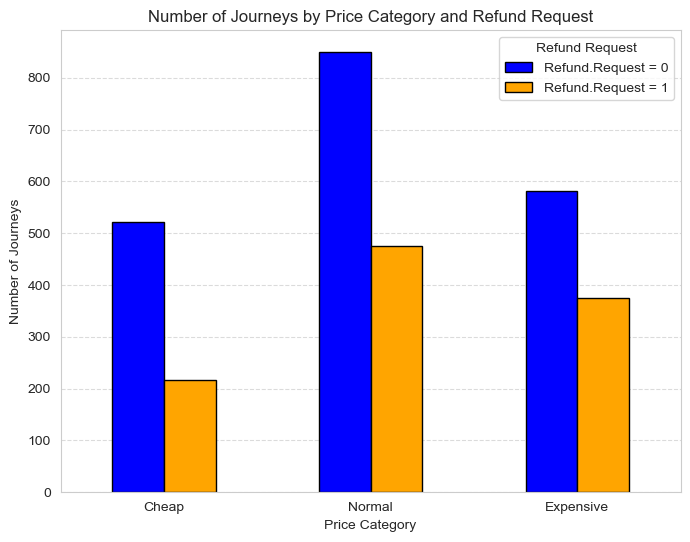

In [877]:
# 1. Price vs Refund.Request

# Define the custom order for the categories
category_order = ['Cheap', 'Normal', 'Expensive']

# Group by Price.Category and Refund.Request to count journeys
price_category_counts = (
    disruptions_data.groupby(['Price.Category', 'Refund.Request']).size()
    .unstack(fill_value=0)  # Pivot to get Refund.Request = 0 and 1 as columns
    .reindex(category_order)  # Reorder the price categories
)

# Plot a grouped bar chart
price_category_counts.plot(
    kind='bar', 
    figsize=(8, 6), 
    color=['blue', 'orange'], 
    edgecolor='black'
)

plt.title('Number of Journeys by Price Category and Refund Request')
plt.xlabel('Price Category')
plt.ylabel('Number of Journeys')
plt.xticks(rotation=0)
plt.legend(['Refund.Request = 0', 'Refund.Request = 1'], title='Refund Request')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [879]:
# Calculate refund percentages per Price.Category
refund_percentage = (
    disruptions_data.groupby('Price.Category')['Refund.Request.Binary']
    .mean() * 100  # Calculate mean (proportion of 1s) and convert to percentage
).reindex(['Cheap', 'Normal', 'Expensive'])  # Ensure the correct order

# Display the result
print(refund_percentage)

Price.Category
Cheap        29.364005
Normal       35.924528
Expensive    39.121339
Name: Refund.Request.Binary, dtype: float64


Takeaway: As price goes up, the % of passengers who requested refunds was also went up but not significantly. Price.Category is a weak predictor for Request.Refund

ps: The population is disurptions_data in (3,020 entries). 

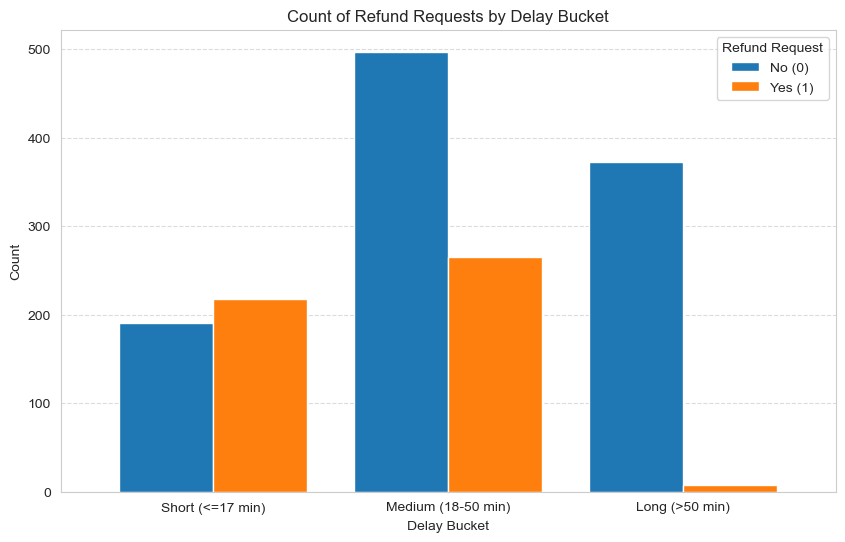

In [882]:
# 2 Delay.In.Minutes vs Refund.Request

# Create a new column for delay buckets using pd.cut
bins = [0, 17, 50, float('inf')]
labels = ['Short (<=17 min)', 'Medium (18-50 min)', 'Long (>50 min)']
disruptions_data['Delay.Bucket'] = pd.cut(
    disruptions_data['Delay.In.Minutes'], bins=bins, labels=labels, right=True
)

# Group data by Delay.Bucket and Refund.Request to count the number of records
bucket_counts = disruptions_data.groupby(
    ['Delay.Bucket', 'Refund.Request'], observed=False
).size().unstack(fill_value=0)

# Plot the bar graph
ax = bucket_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Count of Refund Requests by Delay Bucket')
plt.xlabel('Delay Bucket')
plt.ylabel('Count')
plt.legend(title='Refund Request', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure x-axis labels are displayed horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

In [884]:
# Calculate refund percentages per Delay.Bucket
refund_percentage = disruptions_data.groupby('Delay.Bucket', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Delay.Bucket
Short (<=17 min)      53.300733
Medium (18-50 min)    34.776903
Long (>50 min)         2.099738
Name: Refund.Request.Binary, dtype: float64


Takeaway: Delay.In.Minutes seems to be a weak predictor of Request.Refund. Because longer delays did not result in higher refunds. However keeping Delay.In.Minutes as one of the variables for the regression model might be useful.

ps: The population is disruptions_data (3020 entries). 

In [887]:
# 3 Departure vs Refund.Request

# Use previously filtered data called disruptions_data for non ontime journeys (Delayed or Cancelled)
disruptions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 1 to 31637
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Payment.Method         3020 non-null   object        
 1   Railcard               3020 non-null   object        
 2   Ticket.Class           3020 non-null   object        
 3   Ticket.Type            3020 non-null   object        
 4   Price                  3020 non-null   int64         
 5   Departure.Station      3020 non-null   object        
 6   Arrival.Station        3020 non-null   object        
 7   Departure              3020 non-null   datetime64[ns]
 8   Scheduled.Arrival      3020 non-null   datetime64[ns]
 9   Actual.Arrival         1570 non-null   datetime64[ns]
 10  Journey.Status         3020 non-null   object        
 11  Reason.for.Delay       3020 non-null   object        
 12  Refund.Request         3020 non-null   object        
 13  Month  

In [889]:
# Create a dataframe for counts of Refund.Request grouped by hour and refund status
hourly_counts_filtered = disruptions_data.groupby(['Departure.Hour', 'Refund.Request']).size().unstack(fill_value=0)

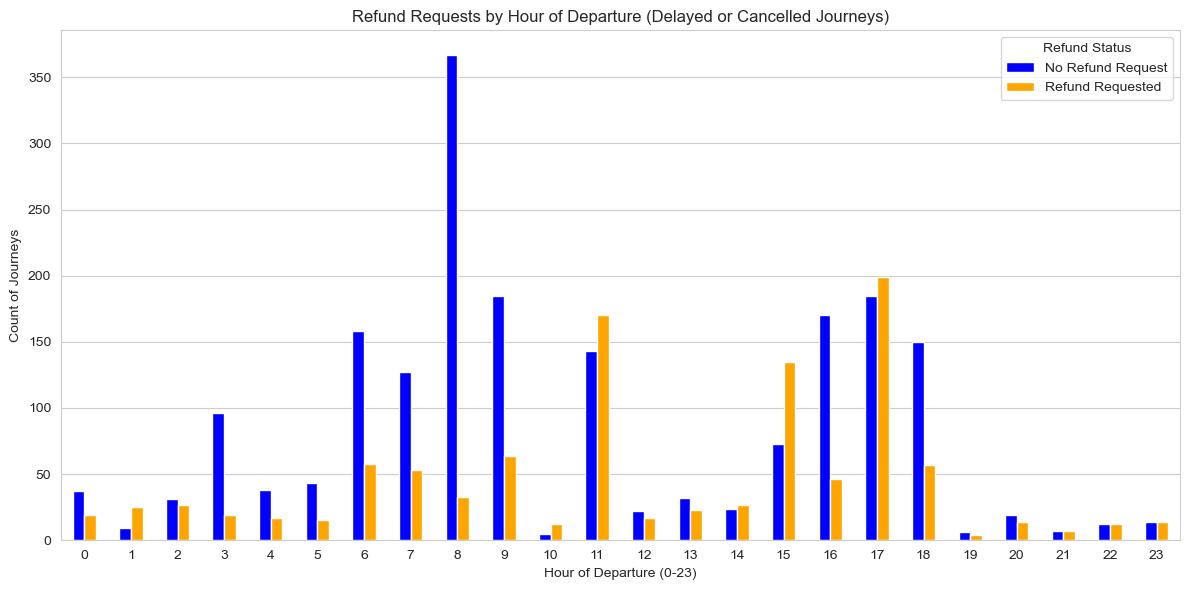

In [891]:
# Plot the counts for each hour and refund status
fig, ax = plt.subplots(figsize=(12, 6))
hourly_counts_filtered.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])
ax.set_title('Refund Requests by Hour of Departure (Delayed or Cancelled Journeys)')
ax.set_xlabel('Hour of Departure (0-23)')
ax.set_ylabel('Count of Journeys')
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status')
ax.grid(axis='y')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Takeaway: The above diagram only includes delayed and cancelled journeys. As we can see, most troubled journeys happened within peak hour 6-9AM and 3-6PM. However there's a clear difference between the passenger's tendency requesting a refund within each hour:
- In the morning, despite being the busiest period, the request refund rate is pretty low. Current hypothesis is that people are going to work and have no time to request refund despite having bad experience with their train journeys.
- In the afternoon or late afternoon, people are more likely to request refund. Current hypothesis is that they have more time at these hours.

Departure.Hour could be a strong predictor for Refund.Request

ps: The population is delayed and cancelled journey in "disruptions_data" (3020 entries). 

In [894]:
# 4 Payment.Method vs Refund.Request

# Use previously filtered data called disruptions_data for non ontime journeys (Delayed or Cancelled)

# Create a dataframe for counts of Refund.Request grouped by payment method and refund status
payment_method_counts_filtered = disruptions_data.groupby(['Payment.Method', 'Refund.Request']).size().unstack(fill_value=0)

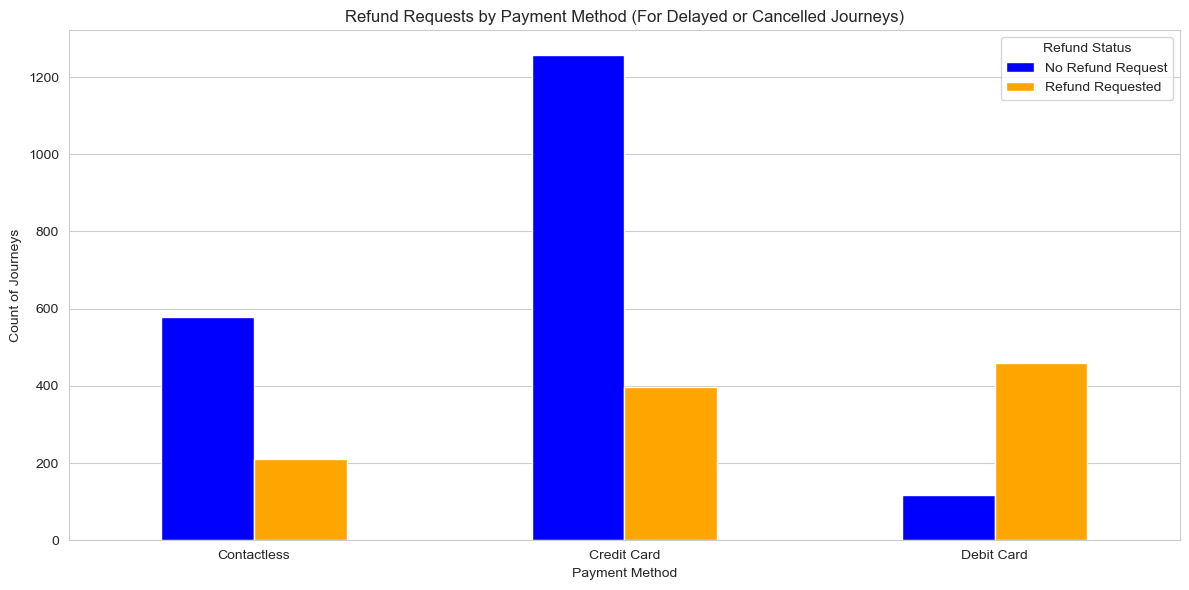

In [896]:
# Plot the counts for each hour and refund status
fig, ax = plt.subplots(figsize=(12, 6))
payment_method_counts_filtered.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])
ax.set_title('Refund Requests by Payment Method (For Delayed or Cancelled Journeys)')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count of Journeys')
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status')
ax.grid(axis='y')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [898]:
# Calculate refund percentages per Payment.Method
refund_percentage = disruptions_data.groupby('Payment.Method', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Payment.Method
Contactless    26.649746
Credit Card    24.033816
Debit Card     79.687500
Name: Refund.Request.Binary, dtype: float64


Takeaway: 79% passengers who experienced non-ontime journeys AND paid with debit card requested refunds, which was significantly higher compared to other payment methods. Current hypothesis is because refund process to debit card is much quicker compared to credit card, but not to contactless as they both have quite the same refund flow (which is a bit weird).

Payment.Method could be a strong predictor to Refund.Request.

ps: The population is delayed and cancelled journey in "disruptions_data" (3020 entries). 

So variables that may have strong relationship with Refund.Request are:
1. Journey.Status
2. Departure.Hour
3. Payment.Method

And variables that may have relationship with Refund.Request, although not strong, are:
1. Delay.In.Minutes
2. Price.Category

Next is to find a new regression model with the above variables to predict Refund.Request better (accuracy must be higher than 64.68%). I'm using logistic regression.

In [902]:
disruptions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 1 to 31637
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Payment.Method         3020 non-null   object        
 1   Railcard               3020 non-null   object        
 2   Ticket.Class           3020 non-null   object        
 3   Ticket.Type            3020 non-null   object        
 4   Price                  3020 non-null   int64         
 5   Departure.Station      3020 non-null   object        
 6   Arrival.Station        3020 non-null   object        
 7   Departure              3020 non-null   datetime64[ns]
 8   Scheduled.Arrival      3020 non-null   datetime64[ns]
 9   Actual.Arrival         1570 non-null   datetime64[ns]
 10  Journey.Status         3020 non-null   object        
 11  Reason.for.Delay       3020 non-null   object        
 12  Refund.Request         3020 non-null   object        
 13  Month  

In [904]:
# Prepare the predictors (independent variables)
predictors = ['Journey.Status', 'Price.Category', 'Departure.Hour', 'Payment.Method', 'Delay.In.Minutes']

# One-hot encode categorical variables and combine them with numerical predictors
X = pd.get_dummies(disruptions_data[predictors], drop_first=True)

# Target variable (dependent variable)
y = disruptions_data['Refund.Request.Binary']  # Ensure this is binary (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increase iterations for better convergence with multiple predictors

# Fit (train) the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Display the model equation
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("\nLogistic Regression Model Equation:")
print(f"logit(p) = {intercept:.4f} + " + " + ".join([f"{coeff:.4f} * {col}" for coeff, col in zip(coefficients, X.columns)]))

Accuracy: 0.7549668874172185

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       586
           1       0.82      0.39      0.53       320

    accuracy                           0.75       906
   macro avg       0.78      0.67      0.68       906
weighted avg       0.77      0.75      0.73       906


Logistic Regression Model Equation:
logit(p) = -0.6955 + 0.0165 * Departure.Hour + -0.0424 * Delay.In.Minutes + -0.0673 * Journey.Status_Delayed + 0.0148 * Price.Category_Expensive + 0.0792 * Price.Category_Normal + -0.2094 * Payment.Method_Credit Card + 2.8214 * Payment.Method_Debit Card


The model is now better with more predictors. However still not good enough.

Next i'm going to try to remove weak predictor (Delay.In.Minutes and Price.Category) from the model and try to add more relevant predictors. I will try:

5. Reason.for.Delay

After further examination, it seems that not all non on-time journeys got refunded. If not influenced by Delay.In.Minutes (as we already know that the correlation between Delay.In.Minutes and Refund.Request is low), then Reason.for.Delay may have further correlations. Let's examine:

<Figure size 800x600 with 0 Axes>

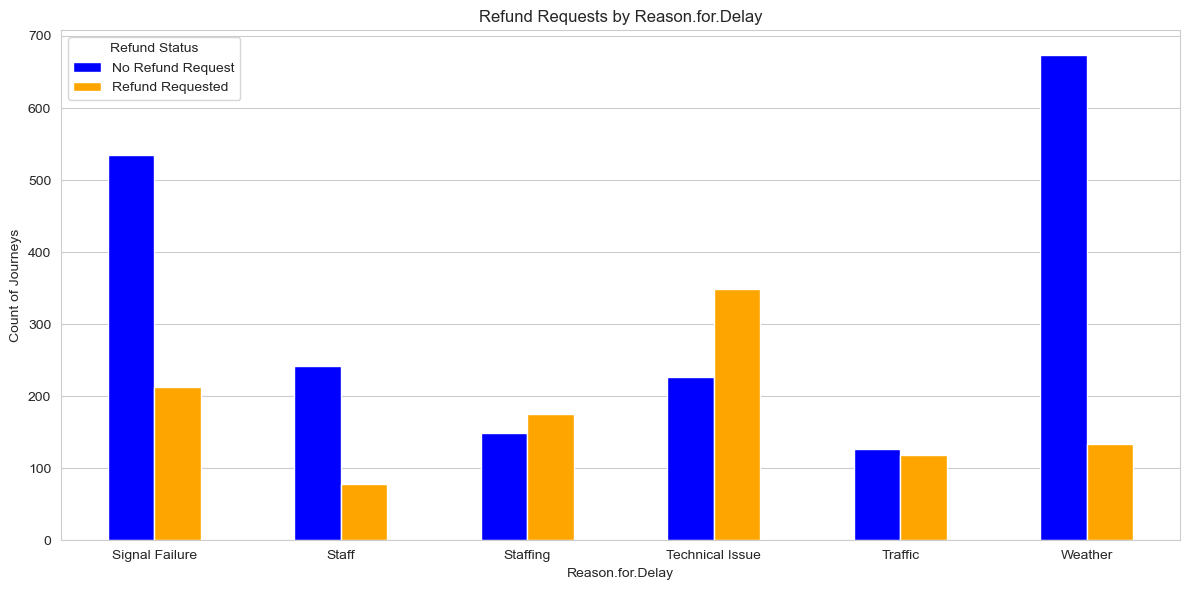

In [907]:
# 5. Reason.for.Refund vs Refund.Request

# Create a dataframe for counts of Refund.Request grouped by Reason.for.Delay
reason_refund_counts = disruptions_data.groupby(['Reason.for.Delay', 'Refund.Request']).size().unstack(fill_value=0)

# Plot using matplotlib
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(reason_refund_counts))

# Plot the counts for each hour and refund status
fig, ax = plt.subplots(figsize=(12, 6))
reason_refund_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])
ax.set_title('Refund Requests by Reason.for.Delay')
ax.set_xlabel('Reason.for.Delay')
ax.set_ylabel('Count of Journeys')
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status')
ax.grid(axis='y')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [909]:
# Calculate refund percentages per Reason.for.Delay
refund_percentage = disruptions_data.groupby('Reason.for.Delay', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Reason.for.Delay
Signal Failure     28.475936
Staff              24.375000
Staffing           54.012346
Technical Issue    60.695652
Traffic            48.373984
Weather            16.480793
Name: Refund.Request.Binary, dtype: float64


Takeaway: It seems like passengers most likely to request refuns when delays were caused by technical issues, staffing issues, and traffic.

Reason.for.Delay could be a strong predictor to Refund.Request.

ps: The population is delayed and cancelled journey in "disruptions_data" (3020 entries).

6. Railcard

<Figure size 800x600 with 0 Axes>

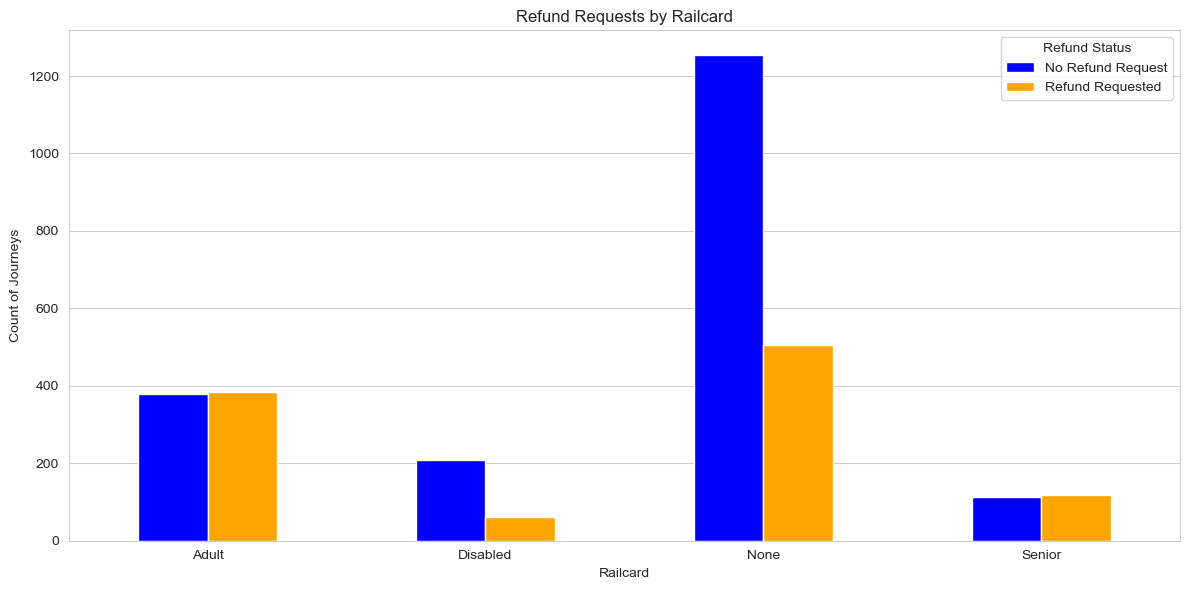

In [913]:
# 6. Railcard vs Refund.Request

# Create a dataframe for counts of Refund.Request grouped by Railcard
reason_refund_counts = disruptions_data.groupby(['Railcard', 'Refund.Request']).size().unstack(fill_value=0)

# Plot using matplotlib
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(reason_refund_counts))

# Plot the counts for each hour and refund status
fig, ax = plt.subplots(figsize=(12, 6))
reason_refund_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])
ax.set_title('Refund Requests by Railcard')
ax.set_xlabel('Railcard')
ax.set_ylabel('Count of Journeys')
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status')
ax.grid(axis='y')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [915]:
# Calculate refund percentages per Railcard
refund_percentage = disruptions_data.groupby('Railcard', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Railcard
Adult       50.328515
Disabled    22.388060
None        28.693182
Senior      51.515152
Name: Refund.Request.Binary, dtype: float64


Takeaway: It seems like having railcard does not necessarily guarantee a passenger would request a refund since there is inconsistency between adult&senior vs disabled.

Railcard is a weak predictor to Refund.Request.

ps: The population is delayed and cancelled journey in "disruptions_data" (3020 entries).

7. Ticket.Class

<Figure size 800x600 with 0 Axes>

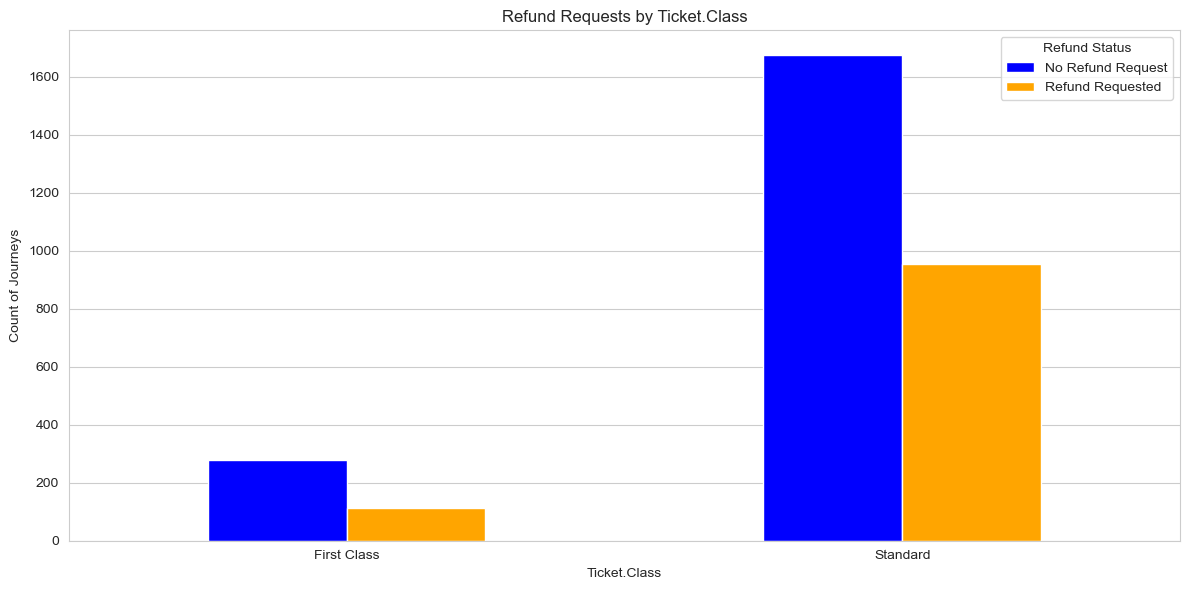

In [919]:
# 7. Ticket.Class vs Refund.Request

# Create a dataframe for counts of Refund.Request grouped by Ticket.Class
reason_refund_counts = disruptions_data.groupby(['Ticket.Class', 'Refund.Request']).size().unstack(fill_value=0)

# Plot using matplotlib
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(reason_refund_counts))

# Plot the counts for each hour and refund status
fig, ax = plt.subplots(figsize=(12, 6))
reason_refund_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])
ax.set_title('Refund Requests by Ticket.Class')
ax.set_xlabel('Ticket.Class')
ax.set_ylabel('Count of Journeys')
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status')
ax.grid(axis='y')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [921]:
# Calculate refund percentages per Ticket.Class
refund_percentage = disruptions_data.groupby('Ticket.Class', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Ticket.Class
First Class    28.974359
Standard       36.273764
Name: Refund.Request.Binary, dtype: float64


Takeaway: Ticket.Class is a strong predictor to Refund.Request.

ps: The population is delayed and cancelled journey in "disruptions_data" (3020 entries).

8. Ticket.Type

<Figure size 800x600 with 0 Axes>

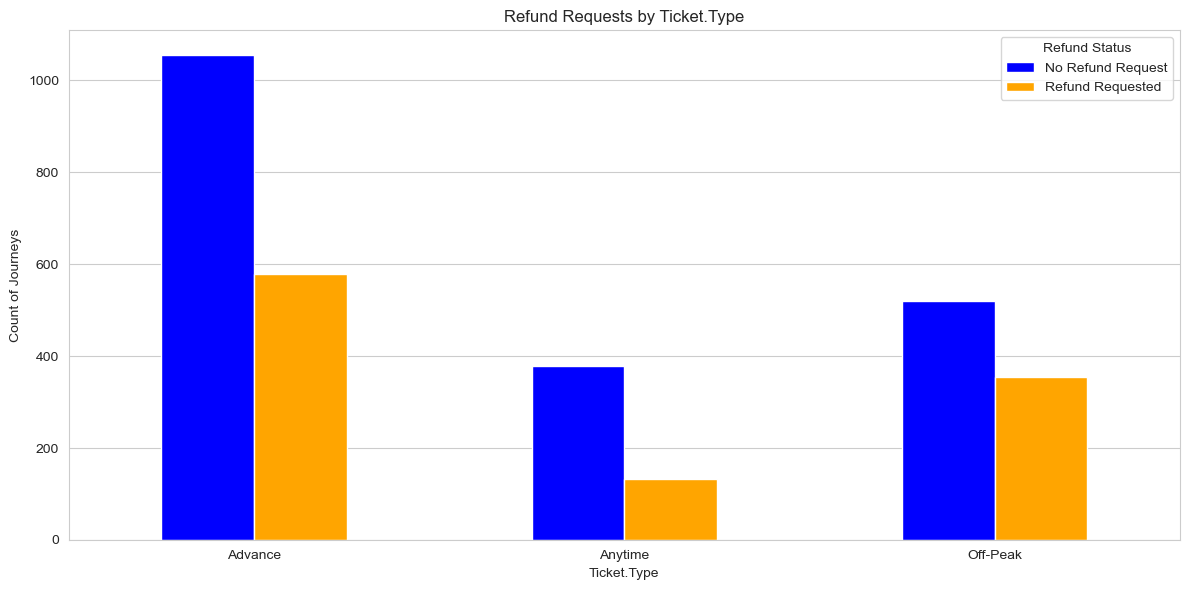

In [925]:
# Create a dataframe for counts of Refund.Request grouped by Ticket.Type
reason_refund_counts = disruptions_data.groupby(['Ticket.Type', 'Refund.Request']).size().unstack(fill_value=0)

# Plot using matplotlib
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(reason_refund_counts))

# Plot the counts for each hour and refund status
fig, ax = plt.subplots(figsize=(12, 6))
reason_refund_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])
ax.set_title('Refund Requests by Ticket.Type')
ax.set_xlabel('Ticket.Type')
ax.set_ylabel('Count of Journeys')
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status')
ax.grid(axis='y')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [927]:
# Calculate refund percentages per Ticket.Type
refund_percentage = disruptions_data.groupby('Ticket.Type', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Ticket.Type
Advance     35.412844
Anytime     26.027397
Off-Peak    40.617849
Name: Refund.Request.Binary, dtype: float64


Takeaway: Ticket.Type is a strong predicor of Refund.Request

9. Departure.Station

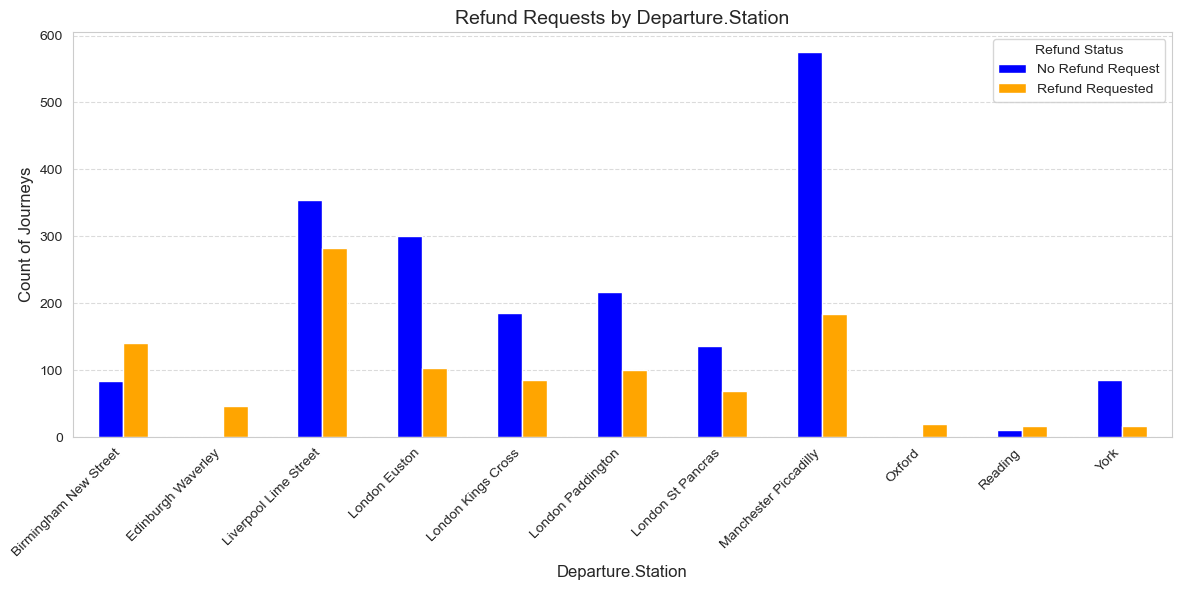

In [937]:
# Create a dataframe for counts of Refund.Request grouped by Departure.Station
reason_refund_counts = disruptions_data.groupby(['Departure.Station', 'Refund.Request']).size().unstack(fill_value=0)

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
reason_refund_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'orange'])

# Set titles and labels
ax.set_title('Refund Requests by Departure.Station', fontsize=14)
ax.set_xlabel('Departure.Station', fontsize=12)
ax.set_ylabel('Count of Journeys', fontsize=12)
ax.legend(['No Refund Request', 'Refund Requested'], title='Refund Status', fontsize=10)

# Rotate x-axis labels and adjust their alignment for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add gridlines for y-axis
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()

In [939]:
# Calculate refund percentages per Departure.Station
refund_percentage = disruptions_data.groupby('Departure.Station', observed=True)['Refund.Request.Binary'].mean() * 100

# Display the result
print(refund_percentage)

Departure.Station
Birmingham New Street     62.666667
Edinburgh Waverley       100.000000
Liverpool Lime Street     44.357367
London Euston             25.679012
London Kings Cross        31.617647
London Paddington         31.761006
London St Pancras         33.658537
Manchester Piccadilly     24.210526
Oxford                    90.476190
Reading                   62.962963
York                      15.686275
Name: Refund.Request.Binary, dtype: float64


Takeaway: Departure.Station is a strong predicor of Refund.Request

So variables that may have strong relationship with Refund.Request are:
1. Journey.Status
2. Departure.Hour
3. Payment.Method
4. Reason.for.Delay
5. Ticket.Class
6. Ticket.Type
7. Departure.Station

And variables that may have relationship with Refund.Request, although not strong, are:
1. Delay.In.Minutes
2. Price.Category
3. Railcard

Next is to find a new regression model with the above variables (with strong relationship only) to predict Refund.Request (accuracy must be higher than 75.5%). I'm using logistic regression.

In [943]:
# Prepare the predictors (independent variables)
predictors = ['Journey.Status', 'Departure.Hour', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Class', 'Ticket.Type', 'Departure.Station']
# One-hot encode categorical variables and combine them with numerical predictors
X = pd.get_dummies(disruptions_data[predictors], drop_first=True)

# Target variable (dependent variable)
y = disruptions_data['Refund.Request.Binary']  # Ensure this is binary (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increase iterations for better convergence with multiple predictors

# Fit (train) the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Display the model equation
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("\nLogistic Regression Model Equation:")
print(f"logit(p) = {intercept:.4f} + " + " + ".join([f"{coeff:.4f} * {col}" for coeff, col in zip(coefficients, X.columns)]))

Accuracy: 0.7726269315673289

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       586
           1       0.81      0.46      0.59       320

    accuracy                           0.77       906
   macro avg       0.79      0.70      0.72       906
weighted avg       0.78      0.77      0.75       906


Logistic Regression Model Equation:
logit(p) = -0.1005 + 0.0149 * Departure.Hour + -1.5953 * Journey.Status_Delayed + -0.1444 * Payment.Method_Credit Card + 2.7136 * Payment.Method_Debit Card + -0.0020 * Reason.for.Delay_Staff + 0.1588 * Reason.for.Delay_Staffing + 0.4760 * Reason.for.Delay_Technical Issue + 0.1950 * Reason.for.Delay_Traffic + -0.6860 * Reason.for.Delay_Weather + 0.4456 * Ticket.Class_Standard + -0.7631 * Ticket.Type_Anytime + 0.0702 * Ticket.Type_Off-Peak + 1.3641 * Departure.Station_Edinburgh Waverley + -0.2292 * Departure.Station_Liverpool Lime Street + -1.0560 * Departure.Station_London Eust

Increasing test size to get the maximum accuracy:

In [946]:
# Prepare the predictors (independent variables)
predictors = ['Journey.Status', 'Departure.Hour', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Class', 'Ticket.Type', 'Departure.Station']
# One-hot encode categorical variables and combine them with numerical predictors
X = pd.get_dummies(disruptions_data[predictors], drop_first=True)

# Target variable (dependent variable)
y = disruptions_data['Refund.Request.Binary']  # Ensure this is binary (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increase iterations for better convergence with multiple predictors

# Fit (train) the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Display the model equation
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("\nLogistic Regression Model Equation:")
print(f"logit(p) = {intercept:.4f} + " + " + ".join([f"{coeff:.4f} * {col}" for coeff, col in zip(coefficients, X.columns)]))

Accuracy: 0.7847682119205298

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       786
           1       0.81      0.50      0.62       422

    accuracy                           0.78      1208
   macro avg       0.80      0.72      0.73      1208
weighted avg       0.79      0.78      0.77      1208


Logistic Regression Model Equation:
logit(p) = -0.1082 + 0.0152 * Departure.Hour + -1.5303 * Journey.Status_Delayed + -0.0716 * Payment.Method_Credit Card + 2.7504 * Payment.Method_Debit Card + 0.0191 * Reason.for.Delay_Staff + 0.1079 * Reason.for.Delay_Staffing + 0.3998 * Reason.for.Delay_Technical Issue + 0.1452 * Reason.for.Delay_Traffic + -0.7098 * Reason.for.Delay_Weather + 0.3313 * Ticket.Class_Standard + -0.7340 * Ticket.Type_Anytime + 0.0708 * Ticket.Type_Off-Peak + 1.3196 * Departure.Station_Edinburgh Waverley + -0.1628 * Departure.Station_Liverpool Lime Street + -0.9820 * Departure.Station_London Eusto

Step 6: Apply the regression model to ToPredict

In [949]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     8 non-null      object        
 1   Railcard           8 non-null      object        
 2   Ticket.Class       8 non-null      object        
 3   Ticket.Type        8 non-null      object        
 4   Price              8 non-null      int64         
 5   Departure.Station  8 non-null      object        
 6   Arrival.Station    8 non-null      object        
 7   Departure          8 non-null      datetime64[ns]
 8   Scheduled.Arrival  8 non-null      datetime64[ns]
 9   Actual.Arrival     5 non-null      datetime64[ns]
 10  Journey.Status     8 non-null      object        
 11  Reason.for.Delay   8 non-null      object        
 12  Delay.In.Minutes   8 non-null      float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory usage: 9

Step 6.1: Ensure the to_predict has the same feature columns as the training data

At this point, I need to add Departure.Hour

In [952]:
# Adding Departure.Hour
to_predict['Departure.Hour'] = to_predict['Departure'].dt.hour

In [954]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     8 non-null      object        
 1   Railcard           8 non-null      object        
 2   Ticket.Class       8 non-null      object        
 3   Ticket.Type        8 non-null      object        
 4   Price              8 non-null      int64         
 5   Departure.Station  8 non-null      object        
 6   Arrival.Station    8 non-null      object        
 7   Departure          8 non-null      datetime64[ns]
 8   Scheduled.Arrival  8 non-null      datetime64[ns]
 9   Actual.Arrival     5 non-null      datetime64[ns]
 10  Journey.Status     8 non-null      object        
 11  Reason.for.Delay   8 non-null      object        
 12  Delay.In.Minutes   8 non-null      float64       
 13  Departure.Hour     8 non-null      int32         
dtypes: datetime64[

Step 6.2: Use the trained logistic regression model to predict refund trends for the to_predict dataset

In [957]:
# Preprocess the new dataset (to_predict)
# Ensure to_predict has the same structure as the training data
to_predict_processed = pd.get_dummies(to_predict, drop_first=True)

# Align the columns with the training data (X)
missing_cols = set(X.columns) - set(to_predict_processed.columns)
for col in missing_cols:
    to_predict_processed[col] = 0
to_predict_processed = to_predict_processed[X.columns]

# Make predictions
predictions = model.predict(to_predict_processed)
probabilities = model.predict_proba(to_predict_processed)

# Add predictions to the dataset
to_predict['Refund.Request.Predicted'] = predictions
to_predict['Refund.Request.Probability'] = probabilities[:, 1]  # Probability of the positive class (Refund)

# Display the updated dataset
from IPython.display import display, HTML

# Render the entire dataset as an HTML table
display(HTML(to_predict.to_html(index=False, max_rows=None)))

Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Delay.In.Minutes,Departure.Hour,Refund.Request.Predicted,Refund.Request.Probability
Debit Card,None,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45:00,2024-01-04 19:05:00,2024-01-04 19:05:00,On Time,N/A,0.0,17,1,0.877068
Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15:00,2024-01-05 09:35:00,2024-01-05 09:35:00,On Time,N/A,0.0,8,0,0.329848
Debit Card,None,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30:00,2024-01-09 17:45:00,2024-01-09 18:07:00,Delayed,Staffing,22.0,15,1,0.843841
Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45:00,2024-01-31 06:15:00,2024-01-31 06:49:00,Delayed,Signal Failure,34.0,5,0,0.210282
Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00:00,2024-02-10 16:30:00,NaT,Cancelled,Technical Issue,0.0,16,0,0.497596
Contactless,None,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-25 15:45:00,2024-02-25 16:15:00,NaT,Cancelled,Staffing,0.0,15,0,0.421696
Debit Card,None,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,2024-03-20 15:30:00,2024-03-20 17:20:00,2024-03-20 17:36:00,Delayed,Staffing,16.0,15,1,0.726127
Credit Card,None,Standard,Advance,22,Birmingham New Street,London St Pancras,2024-04-16 04:30:00,2024-04-16 05:50:00,NaT,Cancelled,Signal Failure,0.0,4,1,0.552877


The result consists of two columns:

Refund_Predicted:

This column contains the binary prediction (0 or 1) made by the Random Forest model:
- 0: No refund is predicted for this entry.
- 1: A refund is predicted for this entry.

Refund_Probability:

This column contains the probability of a refund (class 1) predicted by the Random Forest model:
- Values range from 0 to 1.
- Higher probabilities (closer to 1) indicate a stronger likelihood that a refund will occur, while lower probabilities (closer to 0) suggest the opposite.

# Conclusion

Based on my EDA, I finally chose 7 strong predictor below to build my logistic regression model, 
- Journey.Status 
- Departure.Hour 
- Payment.Method
- Reason.for.Delay
- Ticket.Class
- Ticket.Type
- Departure.Station

to predict refund trends for the to_predict dataset

I also increased my test size to the optimum of 0.4.

With the above predictors, my logistic regression model achieved ~78.5% accuracy.

Then I used this model to predict refund probability for a new dataset, to_predict. There are 8 entries in the new dataset.

Looking at the above predictions, my model got 7 out of 8 (most likely) correct predictions.

Future improvements:
- Re-examine the predictor variables. Check if more variables need to be included.
- Gather more data, especially those with refunds. Current data only has 4% refunds, which is too small to do analysis with objective in future refund predictions. Maybe can expand the timespan of the data, rather than taking 3 months data, take 1 year data. Ensure that we can have more refunds data.